# Trace Clustering in Process Mining

## Importing librarires

In [1]:
import pm4py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
from pm4py.objects.log.log import EventLog


## Importing log
Importing event log of RoadTraffic. It is in XES format with 51 traces.

In [3]:
# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('DataSets/roadtraffic50traces.xes')
#log[1],type(log)

parsing log, completed traces :: 100%|██████████| 51/51 [00:00<00:00, 2374.85it/s]


## Petrinet from Heuristic miner on complete log

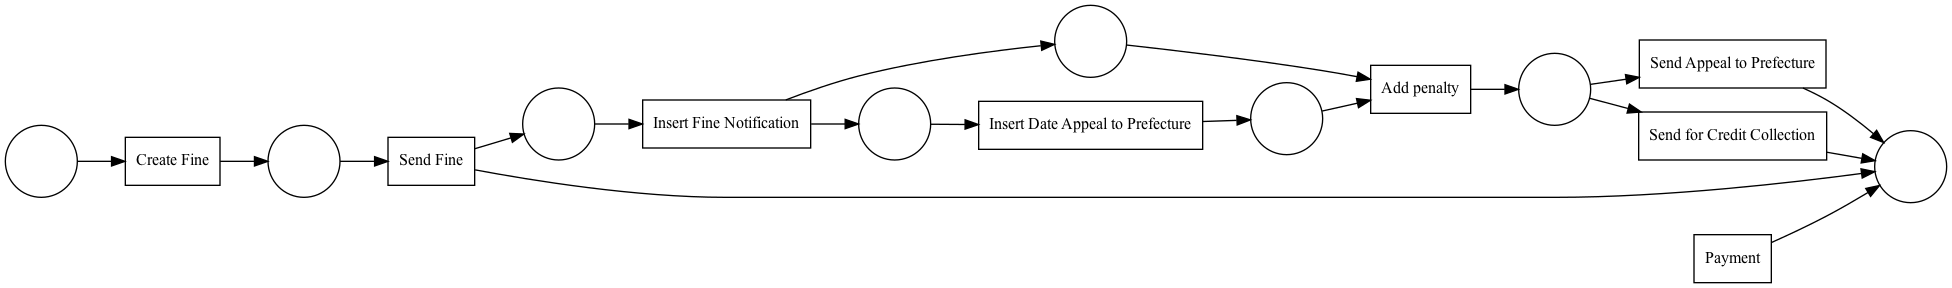

In [10]:
## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, im, fm = alpha_miner.apply(log)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness

In [11]:

from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
simp = simplicity_evaluator.apply(net)
#prec
#fitness, type(fitness)
print('Fitness of log is: ', fitness['log_fitness']*100,'%')
print('Precision of log is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 7/7 [00:00<00:00, 546.83it/s]

Fitness of log is:  79.66501785227098 %
Precision of log is:  64.98516320474778 %
Simplicity of Petrinet is:  80.0 %


### Extracting total Activities

In [13]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
#resources = attributes_filter.get_attribute_values(log, "org:resource")
activities

{'Create Fine': 51,
 'Send Fine': 39,
 'Insert Fine Notification': 32,
 'Add penalty': 32,
 'Send for Credit Collection': 22,
 'Payment': 23,
 'Insert Date Appeal to Prefecture': 1,
 'Send Appeal to Prefecture': 1}

### Converting activity keys in to a list

In [14]:
activities_array = activities.keys()
activities_array = list(activities_array)
activities_array


['Create Fine',
 'Send Fine',
 'Insert Fine Notification',
 'Add penalty',
 'Send for Credit Collection',
 'Payment',
 'Insert Date Appeal to Prefecture',
 'Send Appeal to Prefecture']

### Getting activities of each Trace in a Dataframe

In [15]:
## Converting log in to a pandas dataframe
from pm4py.objects.conversion.log import converter as log_converter
dataframe = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
#dataframe.to_csv('log.csv')
#dataframe
## Trace profiling on Activities
dataframe =dataframe[['case:concept:name','concept:name']]
dataframe

,case:concept:name,concept:name
0,A1,Create Fine
1,A1,Send Fine
2,A100,Create Fine
3,A100,Send Fine
4,A100,Insert Fine Notification
...,...,...
196,A10075,Create Fine
197,A10075,Send Fine
198,A10075,Insert Fine Notification
199,A10075,Add penalty


### Making np_array from Dataframe and grouping them on the basis of case identifier

In [16]:
np_arr = np.array(dataframe)
#np_arr
n = np.unique(np_arr[:,0])
events = np.array( [(np_arr[np_arr[:,0]==i,1]) for i in n] )
events

array([array(['Create Fine', 'Send Fine'], dtype=object),
       array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
              'Add penalty', 'Send for Credit Collection'], dtype=object),
       array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
              'Add penalty', 'Payment'], dtype=object)               ,
       array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
              'Insert Date Appeal to Prefecture', 'Add penalty',
              'Send Appeal to Prefecture'], dtype=object)            ,
       array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
              'Add penalty', 'Send for Credit Collection'], dtype=object),
       array(['Create Fine', 'Payment'], dtype=object),
       array(['Create Fine', 'Payment'], dtype=object),
       array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
              'Add penalty', 'Send for Credit Collection'], dtype=object),
       array(['Create Fine', 'Send Fine', 'Inser

## 2d Vector of Number of CASES X Number of Activities

In [17]:
length  = len(log)
width = len(activities)
length,width
vectors  = [ [0] * width for _ in range(length)]
type(vectors),len(vectors)
vectors

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 

## Activities Profiling - Updating Vector with the count of occurence of Activities

In [18]:
for i in range(len(events)):
        for j in range(len(events[i])):
                if events[i][j] == activities_array[0]:
                    vectors[i][0] += 1
                elif events[i][j] == activities_array[1]:
                    vectors[i][1] += 1
                elif events[i][j] == activities_array[2]:
                    vectors[i][2] += 1
                elif events[i][j] == activities_array[3]:
                    vectors[i][3] += 1
                elif events[i][j] == activities_array[4]:
                    vectors[i][4] += 1
                elif events[i][j] == activities_array[5]:
                    vectors[i][5] += 1
                elif events[i][j] == activities_array[6]:
                    vectors[i][6] += 1
                elif events[i][j] == activities_array[7]:
                    vectors[i][7] += 1
                

### Making ND-Array of the Activity Vector

In [19]:
np_vectors = np.array(vectors)
np_vectors

array([[1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 2, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 2, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0],
       [1,

## Elbow Method to find optimal number of clusters

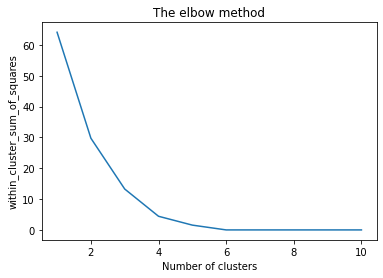

In [20]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(np_vectors)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()

# KMeans - Euclidean

In [21]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(np_vectors)
kmeans.labels_
clustered  = kmeans.predict(np_vectors)
clustered


array([1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 2, 2, 0, 1, 1, 0], dtype=int32)

## Array of Sizes of clustered Data

In [22]:
count_arr = np.bincount(clustered)
print(count_arr)


[23 19  9]


## Creating Sub Event Logs based on Clustering Output

In [23]:
length1  = count_arr[0]
length2 = count_arr[1]
length3 = count_arr[2]

sub_log1 = EventLog()
sub_log2 = EventLog()
sub_log3 = EventLog()

for i in range(len(clustered)):
    if clustered[i] == 0:
        sub_log1.append(log[i])
    
    elif clustered[i] == 1:
        sub_log2.append(log[i])
        
    elif clustered[i] == 2: 
        sub_log3.append(log[i])

# Petrinets from Alpha miner on Sub Event Logs

## Petrinets from Heuristic miner on Sub Event Log1

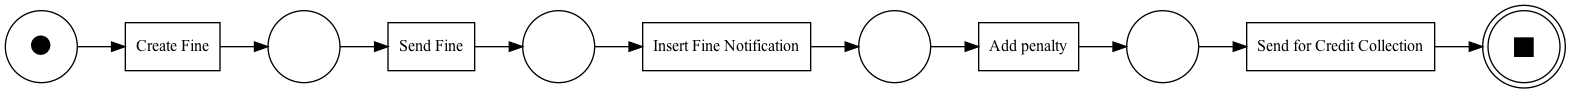

In [24]:

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(sub_log1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [26]:

fitness = replay_fitness_evaluator.apply(sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 1407.48it/s]

Fitness of Petrinet is:  99.27007299270073 %
Precision of Petrinet is:  99.13793103448276 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

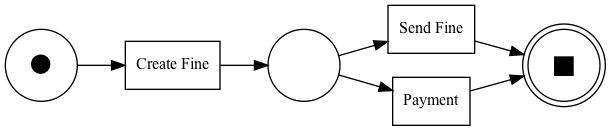

In [27]:

## Import the petrinet visualizer object
net, im, fm = heuristics_miner.apply(sub_log2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [28]:


fitness = replay_fitness_evaluator.apply(sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 287.89it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

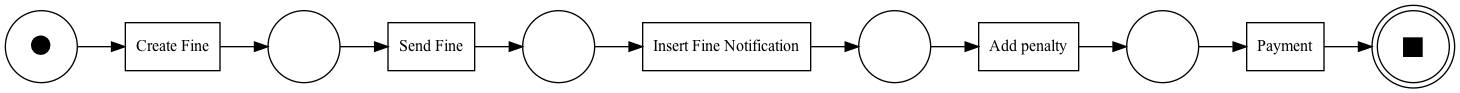

In [30]:

## Import the petrinet visualizer object
net, im, fm = heuristics_miner.apply(sub_log3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub event log

In [31]:

fitness = replay_fitness_evaluator.apply(sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 569.41it/s]

Fitness of Petrinet is:  96.42857142857143 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


# DB SCAN

## Hamming Distance

In [54]:
from sklearn.cluster import DBSCAN
clustering_DB_Hamm = DBSCAN(eps=0.3, min_samples=1, metric ='hamming').fit(np_vectors)


clustering_DB_Hamm = clustering_DB_Hamm.fit_predict(np_vectors)
clustering_DB_Hamm
# clustered = clustering.labels_
# clustered


array([0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1])

### Size of Clusters

In [55]:
count_arr_DB1 = np.bincount(clustering_DB_Hamm)
print(count_arr_DB1)


[19 31  1]


## Creating Sub Event Logs based on Clustering Output

In [35]:
length1  = count_arr_DB1[0]
length2 = count_arr_DB1[1]
length3 = count_arr_DB1[2]

sub_log1_DB1 = EventLog()
sub_log2_DB1 = EventLog()
sub_log3_DB1 = EventLog()

for i in range(len(clustering_DB_Hamm)):
    if clustering_DB_Hamm[i] == 0:
        sub_log1_DB1.append(log[i])
    
    elif clustering_DB_Hamm[i] == 1:
        sub_log2_DB1.append(log[i])
        
    elif clustering_DB_Hamm[i] == 2: 
        sub_log3_DB1.append(log[i])


 

## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Hamming Distance

### Petrinets from Alpha miner on Sub Event Log1

### Log Fitness and Precision of SubLog1

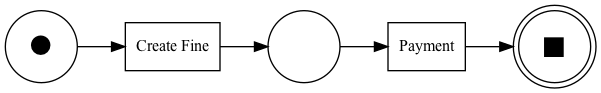

replaying log with TBR, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 1651.95it/s]

Fitness of Petrinet is:  86.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


In [37]:
net, im, fm = heuristics_miner.apply(sub_log1_DB1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

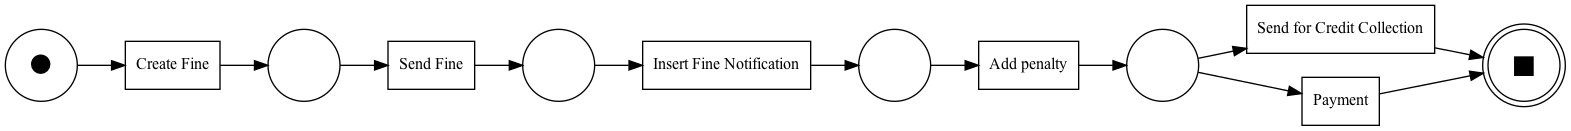

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 750.97it/s]

Fitness of Petrinet is:  98.93617021276596 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


In [38]:
net, im, fm = heuristics_miner.apply(sub_log2_DB1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# DB Scan 
## Euclidean Distance

In [60]:
from sklearn.cluster import DBSCAN
clustering_DB_Euclidean = DBSCAN(eps=1.2, min_samples=1, metric ='euclidean').fit(np_vectors)


clustering_DB_Euclidean = clustering_DB_Euclidean.fit_predict(np_vectors)
clustering_DB_Euclidean
# clustered = clustering.labels_
# clustered


array([0, 1, 2, 3, 1, 4, 4, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 4, 1, 4, 1,
       1, 4, 4, 2, 1, 0, 2, 2, 1, 0, 1, 4, 4, 1, 0, 4, 4, 4, 4, 2, 1, 1,
       1, 2, 2, 1, 0, 0, 1])

### Size of Clusters

In [61]:
count_arr_DB2 = np.bincount(clustering_DB_Euclidean)
print(count_arr_DB2)


[ 7 22  9  1 12]


## Creating Sub Event Logs based on Clustering Output

In [63]:
length1  = count_arr_DB2[0]
length2 = count_arr_DB2[1]
length3 = count_arr_DB2[2]
length4 = count_arr_DB2[3]
length5 = count_arr_DB2[4]

sub_log1_DB2 = EventLog()
sub_log2_DB2 = EventLog()
sub_log3_DB2 = EventLog()
sub_log4_DB2 = EventLog()
sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Euclidean)):
    if clustering_DB_Euclidean[i] == 0:
        sub_log1_DB2.append(log[i])
    
    elif clustering_DB_Euclidean[i] == 1:
        sub_log2_DB2.append(log[i])
        
    elif clustering_DB_Euclidean[i] == 2: 
        sub_log3_DB2.append(log[i])
        
    elif clustering_DB_Euclidean[i] == 3: 
        sub_log4_DB2.append(log[i])
    
    elif clustering_DB_Euclidean[i] == 4: 
        sub_log5_DB2.append(log[i])


## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

### Petrinets from Alpha miner on Sub Event Log1

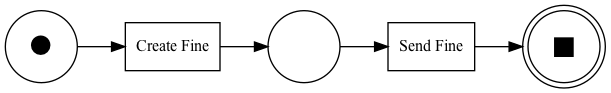

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


In [68]:
net, im, fm = heuristics_miner.apply(sub_log1_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.85})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

### Petrinets from Alpha miner on Sub Event Log2

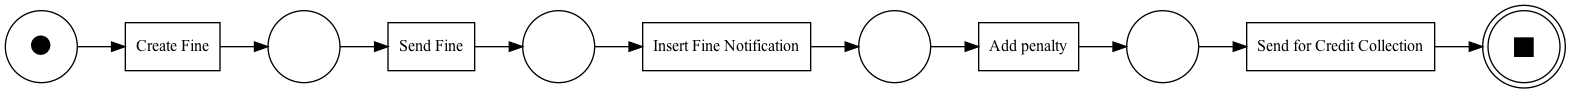

replaying log with TBR, completed variants :: 100%|██████████| 4/4 [00:00<00:00, 1405.01it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


In [69]:
net, im, fm = heuristics_miner.apply(sub_log2_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.85})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of SubLog3

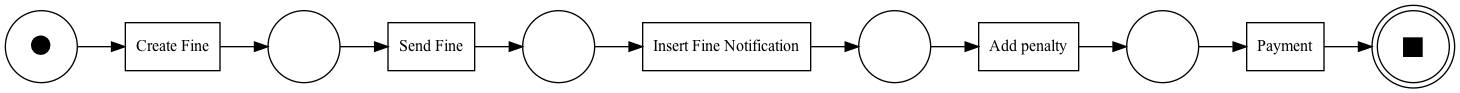

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 2522.74it/s]

Fitness of Petrinet is:  96.42857142857143 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


In [71]:

net, im, fm = heuristics_miner.apply(sub_log3_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log3_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log4

## Log Fitness and Precision of Sub Event log 4

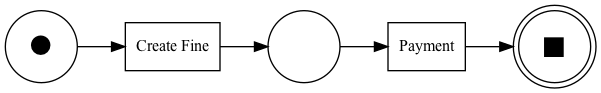

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


In [73]:
net, im, fm = heuristics_miner.apply(sub_log5_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log5_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log5_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# DB Scan
## Jaccard  Distance

In [82]:
from sklearn.cluster import DBSCAN
clustering_DB_Jaccard = DBSCAN(eps=0.4, min_samples=1, metric ='jaccard').fit(np_vectors)
clustering_DB_Jaccard = clustering_DB_Jaccard.fit_predict(np_vectors)
clustering_DB_Jaccard
# clustered = clustering.labels_
# clustered

array([0, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 3, 3, 1, 1, 0, 1, 1, 1, 0, 1, 3, 3, 1, 0, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1])

In [78]:
# Removing Negative values by scaling by 1
for i in range(len(clustering_DB_Jaccard)):
    clustering_DB_Jaccard[i]=clustering_DB_Jaccard[i]+1

In [83]:
count_arr_DB3 = np.bincount(clustering_DB_Jaccard)
print(count_arr_DB3)


[ 7 31  1 12]


## Creating Sub Event Logs based on Clustering Output

In [85]:
length1  = count_arr_DB3[0]
length2 = count_arr_DB3[1]
length3 = count_arr_DB3[2]
length4 = count_arr_DB3[3]
# length5 = count_arr_DB2[4]

sub_log1_DB3 = EventLog()
sub_log2_DB3 = EventLog()
sub_log3_DB3 = EventLog()
sub_log4_DB3 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Jaccard)):
    if clustering_DB_Jaccard[i] == 0:
        sub_log1_DB3.append(log[i])
    
    elif clustering_DB_Jaccard[i] == 1:
        sub_log2_DB3.append(log[i])
        
    elif clustering_DB_Jaccard[i] == 2: 
        sub_log3_DB3.append(log[i])
    elif clustering_DB_Jaccard[i] == 3: 
        sub_log4_DB3.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Jaccard Distance

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

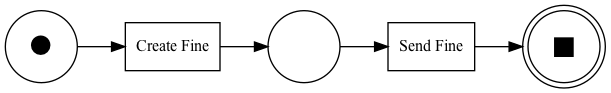

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


In [88]:
net, im, fm = heuristics_miner.apply(sub_log1_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.8})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

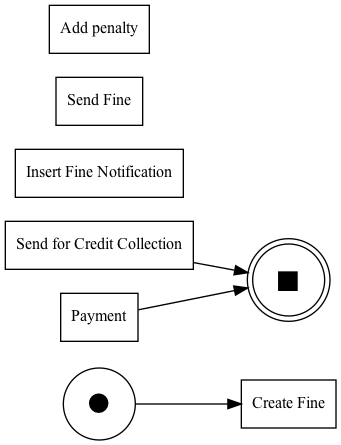

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 918.47it/s]

Fitness of Petrinet is:  98.4375 %
Precision of Petrinet is:  23.039215686274506 %
Simplicity of Petrinet is:  100.0 %


In [89]:
net, im, fm = heuristics_miner.apply(sub_log2_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

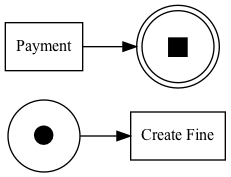

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  66.66666666666667 %
Simplicity of Petrinet is:  100.0 %


In [93]:
net, im, fm = heuristics_miner.apply(sub_log4_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log4_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# Agglomerative Clustering
## Euclidean

In [94]:

from sklearn.cluster import AgglomerativeClustering

clustering_Agglomerative = AgglomerativeClustering(n_clusters=3,affinity='euclidean').fit(np_vectors)
clustering_Agglomerative =clustering_Agglomerative.labels_
clustering_Agglomerative

array([0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 2, 2, 1, 0, 0, 1])

In [95]:
count_arr_Aglomerative = np.bincount(clustering_Agglomerative)
print(count_arr_Aglomerative)


[19 23  9]


## Creating Sub Event Logs based on Clustering Output

In [96]:
length1  = count_arr_Aglomerative[0]
length2 = count_arr_Aglomerative[1]
length3 = count_arr_Aglomerative[2]
# length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_AG = EventLog()
sub_log2_AG = EventLog()
sub_log3_AG = EventLog()
# sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_Agglomerative)):
    if clustering_Agglomerative[i] == 0:
        sub_log1_AG.append(log[i])
    
    elif clustering_Agglomerative[i] == 1:
        sub_log2_AG.append(log[i])
        
    elif clustering_Agglomerative[i] == 2: 
        sub_log3_AG.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

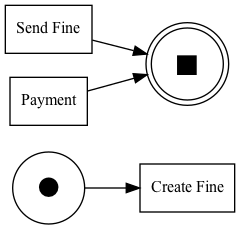

replaying log with TBR, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 861.25it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  60.0 %
Simplicity of Petrinet is:  100.0 %


In [97]:

net, im, fm = heuristics_miner.apply(sub_log1_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

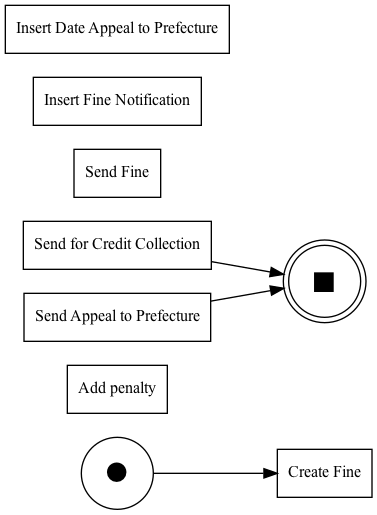

replaying log with TBR, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 1603.43it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  19.332406119610567 %
Simplicity of Petrinet is:  100.0 %


In [98]:

net, im, fm = heuristics_miner.apply(sub_log2_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

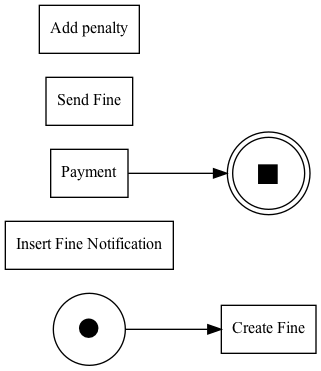

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 2211.49it/s]

Fitness of Petrinet is:  95.0 %
Precision of Petrinet is:  23.857868020304572 %
Simplicity of Petrinet is:  100.0 %


In [99]:

net, im, fm = heuristics_miner.apply(sub_log3_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log3_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# Self Organizing Maps - SOM


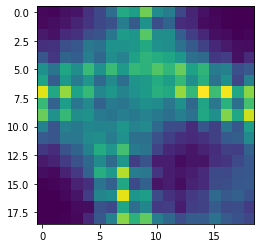

In [100]:
import susi
import numpy as np
import matplotlib.pyplot as plt
som = susi.SOMClustering()
som.fit(np_vectors)
umat = som.get_u_matrix()
clusters = som.get_bmus(np_vectors)
#print(clusters)
plt.imshow(np.squeeze(umat))

### Unique Clusters

In [101]:
unique_clusters = np.unique(clusters, axis=0)
unique_clusters

array([[0, 0],
       [0, 9],
       [4, 3],
       [7, 6],
       [9, 0],
       [9, 9]])

In [ ]:
unique_clusters[0][0],unique_clusters[0][1]
unique_clusters[i][0] , unique_clusters[i][1]


(0, 5)

## Making Sub Event Logs on the basis of SOM Clusters

In [102]:

som_sub_log1 = EventLog()
som_sub_log2 = EventLog()
som_sub_log3 = EventLog()
som_sub_log4 = EventLog()
som_sub_log5 = EventLog()
som_sub_log6 = EventLog()



for i in range(len(clusters)):
    if clusters[i][0] == unique_clusters[0][0] and clusters[i][1] ==unique_clusters[0][1]:
        som_sub_log1.append(log[i])
    
    elif clusters[i][0] == unique_clusters[1][0] and clusters[i][1] ==unique_clusters[1][1]:
        som_sub_log2.append(log[i])

    elif clusters[i][0] == unique_clusters[2][0] and clusters[i][1] ==unique_clusters[2][1]:
        som_sub_log3.append(log[i])
        
    elif clusters[i][0] == unique_clusters[3][0] and clusters[i][1] ==unique_clusters[3][1]:
        som_sub_log4.append(log[i])

    elif clusters[i][0] == unique_clusters[4][0] and clusters[i][1] ==unique_clusters[4][1]:
        som_sub_log5.append(log[i])

    elif clusters[i][0] == unique_clusters[5][0] and clusters[i][1] ==unique_clusters[5][1]:
        som_sub_log6.append(log[i])

    

   


### Checking sizes of clusters

In [103]:
len(som_sub_log1),len(som_sub_log2),len(som_sub_log3),len(som_sub_log4),len(som_sub_log5),len(som_sub_log6)

(7, 12, 1, 7, 22, 2)

# Petrinets from Alpha miner on Sub Event Logs generated from SOM

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

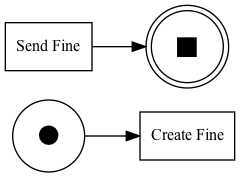

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  66.66666666666667 %
Simplicity of Petrinet is:  100.0 %


In [104]:

net, im, fm = heuristics_miner.apply(som_sub_log1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

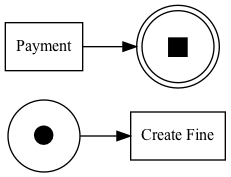

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  66.66666666666667 %
Simplicity of Petrinet is:  100.0 %


In [107]:

net, im, fm = heuristics_miner.apply(som_sub_log2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

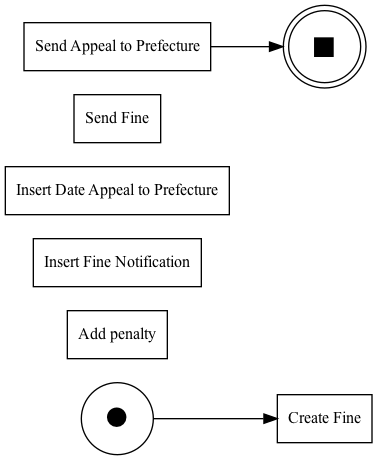

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 814.05it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  19.354838709677423 %
Simplicity of Petrinet is:  100.0 %


In [108]:

net, im, fm = heuristics_miner.apply(som_sub_log3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 4

## Log Fitness and Precision of SubLog 4

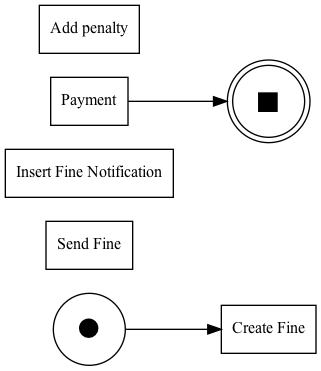

replaying log with TBR, completed variants :: 100%|██████████| 4/4 [00:00<00:00, 2109.55it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  23.809523809523814 %
Simplicity of Petrinet is:  100.0 %


In [109]:

net, im, fm = heuristics_miner.apply(som_sub_log4, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log4, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log4, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 5

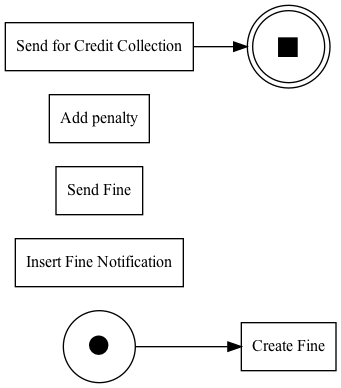

replaying log with TBR, completed variants :: 100%|██████████| 4/4 [00:00<00:00, 1018.84it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  23.809523809523814 %
Simplicity of Petrinet is:  100.0 %


In [110]:

net, im, fm = heuristics_miner.apply(som_sub_log5, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log5, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log5, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Log Fitness and Precision of SubLog 6

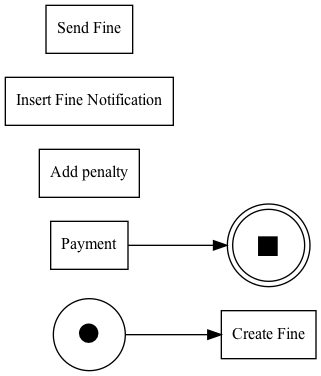

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 2611.00it/s]

Fitness of Petrinet is:  83.33333333333334 %
Precision of Petrinet is:  24.0 %
Simplicity of Petrinet is:  100.0 %


In [111]:

net, im, fm = heuristics_miner.apply(som_sub_log6, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log6, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log6, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')